<a href="https://www.kaggle.com/code/yutakatarokusumah/boston-dataset-islp-exercise?scriptVersionId=269183224" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This notebook is made for exercise 2.10 of the book [An Introduction to Statistical Learning: With Applications in Python (Springer Texts in Statistics)](https://www.statlearning.com/). Thank you for the authors: Gareth James , Daniela Witten, Trevor Hastie, Robert Tibshirani, and Jonathan Taylor for providing me with free, accessible knowledge.

Start with importing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install ISLP
import ISLP

Then, we load the data. [Dataset](https://islp.readthedocs.io/en/latest/datasets/Boston.html)

In [2]:
df = ISLP.load_data('Boston')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


It can be seen that there is 506 rows (total observed suburbs in Boston) and 11 columns (measured variables).

- crim: per capita crime rate by town.
- zn: proportion of residential land zoned for lots over 25,000 sq.ft.
- indus: proportion of non-retail business acres per town.
- chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- nox: nitrogen oxides concentration (parts per 10 million).
- rm: average number of rooms per dwelling.
- age: proportion of owner-occupied units built prior to 1940.
- dis: weighted mean of distances to five Boston employment centres.
- rad: index of accessibility to radial highways.
- tax: full-value property-tax rate per \$10,000.
- ptratio: pupil-teacher ratio by town.
- lstat: lower status of the population (percent).
- medv: median value of owner-occupied homes in \$1000s.

In [3]:
df_info = pd.DataFrame({'Non-Null Count': df.count(), 
                        'Dtype': df.dtypes, 
                        'Uniques': df.nunique()
                       }).reset_index(names='Columns')
display(df_info) # df_info() manually created and stored into a DataFrame
display(df['chas'].unique())
display(df['rad'].unique())

,Columns,Non-Null Count,Dtype,Uniques
0,crim,506,float64,504
1,zn,506,float64,26
2,indus,506,float64,76
3,chas,506,int64,2
4,nox,506,float64,81
5,rm,506,float64,446
6,age,506,float64,356
7,dis,506,float64,412
8,rad,506,int64,9
9,tax,506,int64,66


array([0, 1])

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

`chas` (Charles River indicator variable) is categorical, while `rad` (Index of accessibility to radial highways) are ordinal.

Other variables is clearly quantitative by looking at their explanation, e.g. "Per capita", "Proportion", "Concentration", etc.

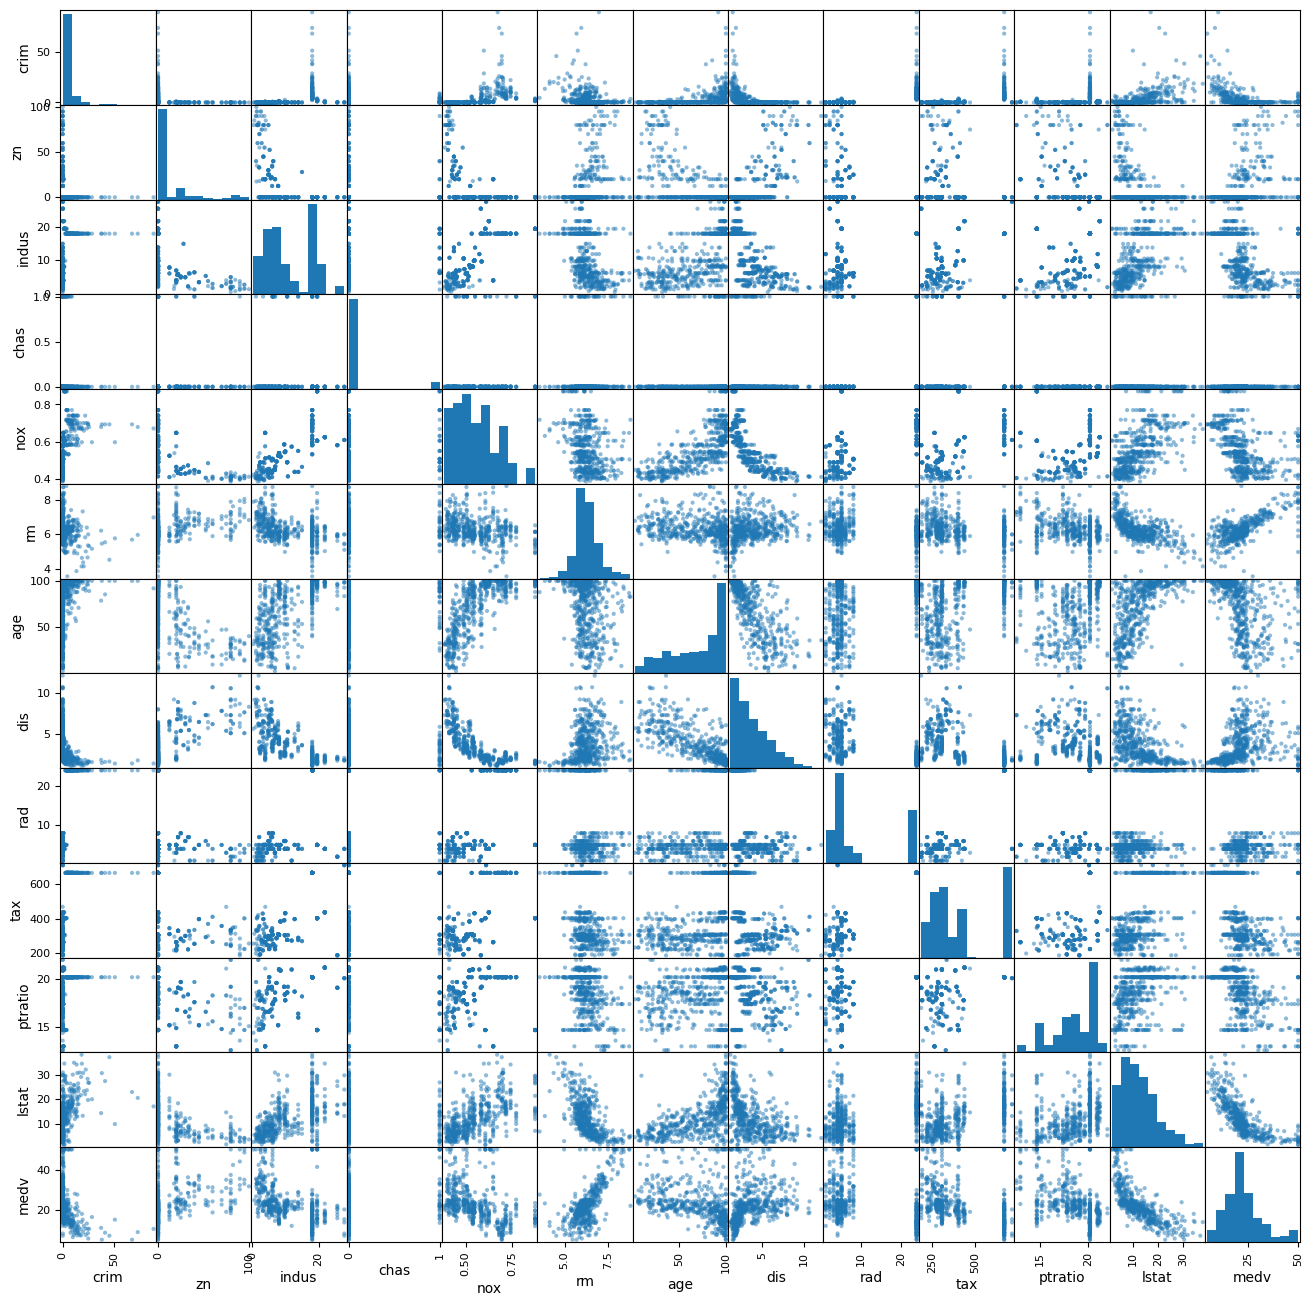

In [4]:
fig, ax = plt.subplots(13, 13, figsize=(16,16))
pd.plotting.scatter_matrix(df, ax=ax);

An initial scatter matrix revealed that some relationships is not suited for a scatter plot, as one of the variables are categorical.


A filtered scatter matrix will collect the useful linear relationships in a scatter plot.

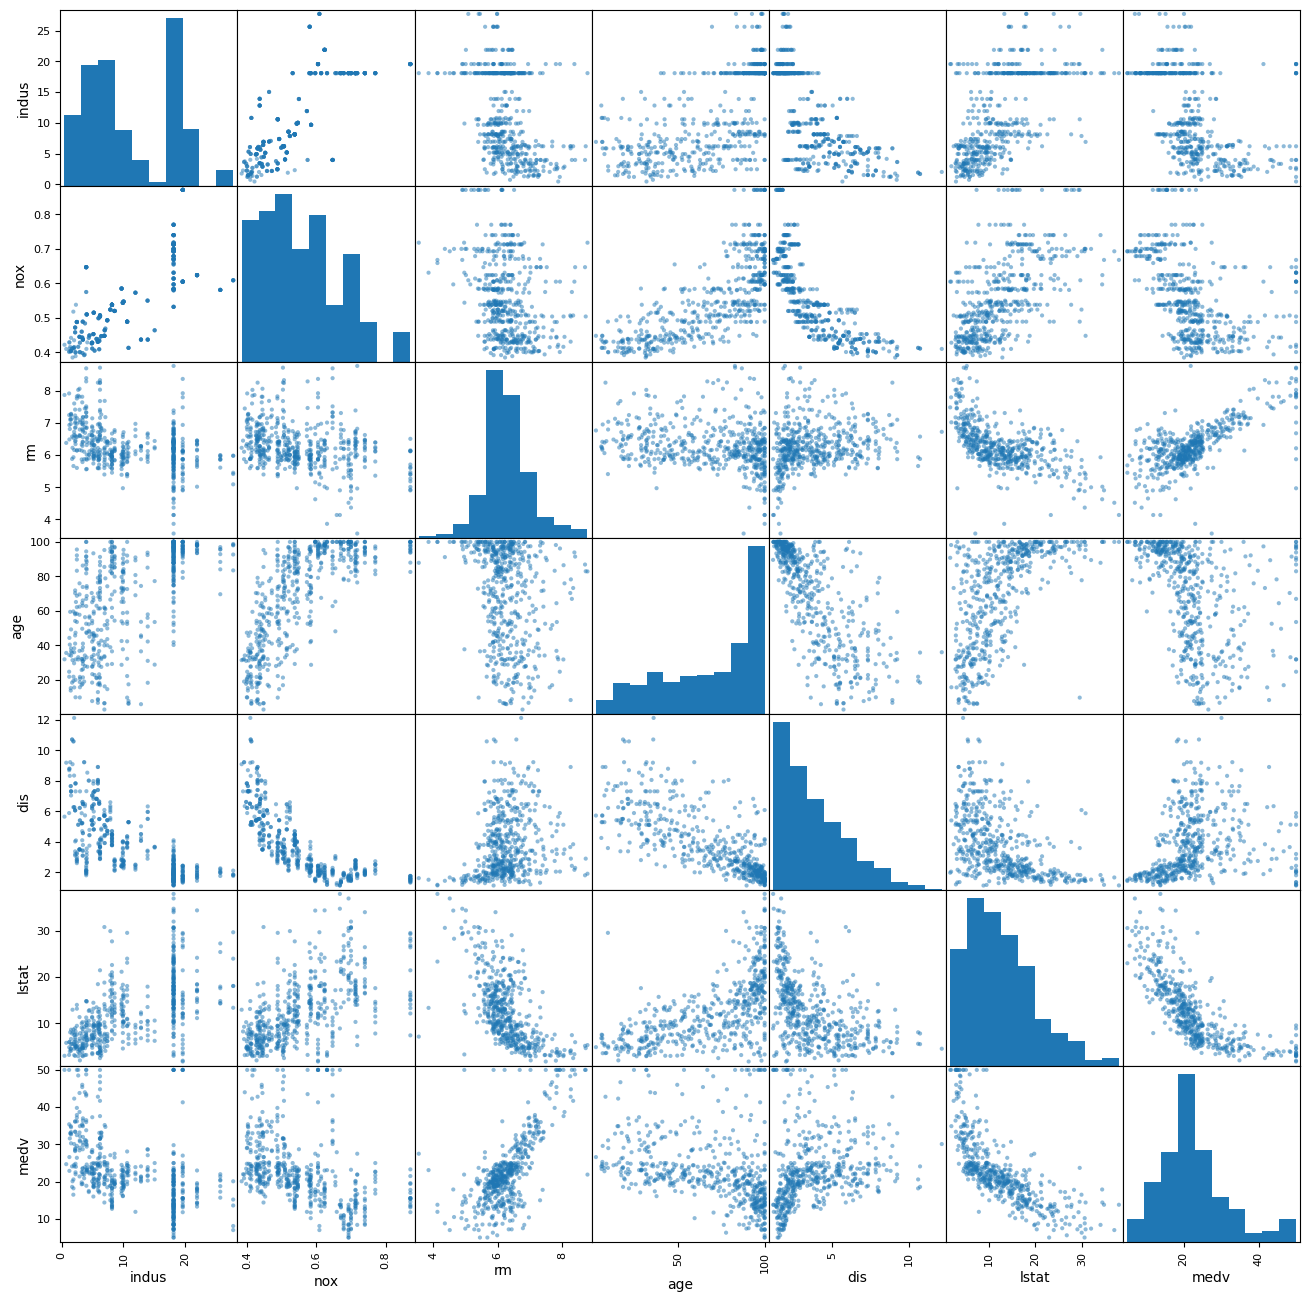

In [5]:
pd.plotting.scatter_matrix(df[['indus', 'nox', 'rm', 'age', 'dis', 'lstat', 'medv']], figsize=(16, 16));

Some relationship are linear, as shown above.

The other relationships are plotted below, with some showing clustered data.

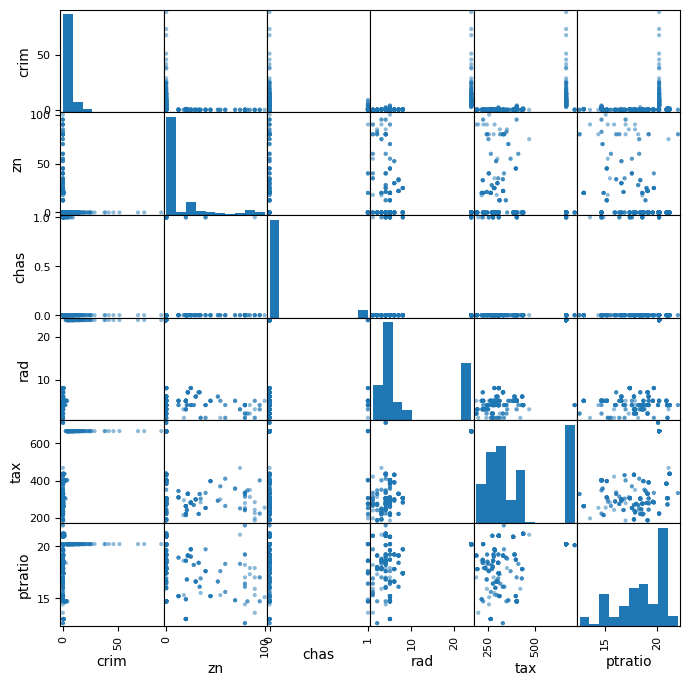

In [6]:
pd.plotting.scatter_matrix(df[['crim', 'zn', 'chas', 'rad', 'tax', 'ptratio']], figsize=(8, 8));

In [7]:
df.corrwith(df['crim']).sort_values()

medv      -0.388305
dis       -0.379670
rm        -0.219247
zn        -0.200469
chas      -0.055892
ptratio    0.289946
age        0.352734
indus      0.406583
nox        0.420972
lstat      0.455621
tax        0.582764
rad        0.625505
crim       1.000000
dtype: float64

Median value and distance to employment centres seems to negatively correlate with per capita crime rate.

Tax, accessibility to radial highways, and some others seems to positively correlate with it too.

As shown below, the full-value property-tax rates and pupil-teacher ratios of the suburbs of Boston does not appear to have particularly high values, but some pupil-teacher ratios have particularly low crime rates. 

On the other hand, the crime rates shows 2 clusters: around a range of 0-8 and 8-27. There are 8 outlier values having particularly high crime rates.

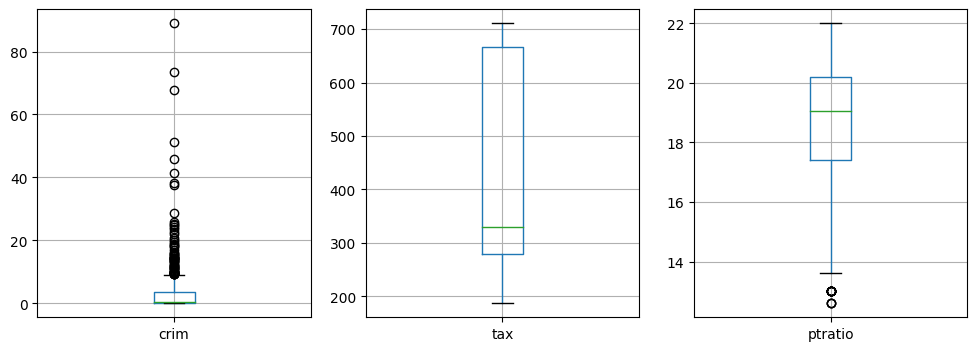

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
df.boxplot(column='crim', ax=ax[0]);
df.boxplot(column='tax', ax=ax[1]);
df.boxplot(column='ptratio', ax=ax[2]);

To satisfy the exercise given by ISLP, the following answers have been found:


35 suburbs bound the Charles river, found by

In [9]:
df.loc[df['chas'] == 1, 'chas'].count()

35

The median pupil-teacher ratio among the towns in this data set is 19.05, taken from

In [10]:
df['ptratio'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

There is 2 suburbs in this data set tying the lowest median value of owner-occupied homes, being 5.0.

In [11]:
print(df['medv'].min()) # 5.0 is the lowest median value of owner-occupied homes.

# display(df.sort_values(by='medv', ignore_index=True)[0:2]) Alternative
display(df[df['medv'] == df['medv'].min()])

df.describe().loc[['min', '25%', '50%', '75%', 'max']]

5.0


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
min,0.006320,0.0,0.46,0.0,0.385,3.5610,2.900,1.129600,1.0,187.0,12.60,1.730,5.000
25%,0.082045,0.0,5.19,0.0,0.449,5.8855,45.025,2.100175,4.0,279.0,17.40,6.950,17.025
50%,0.256510,0.0,9.69,0.0,0.538,6.2085,77.500,3.207450,5.0,330.0,19.05,11.360,21.200
75%,3.677083,12.5,18.10,0.0,0.624,6.6235,94.075,5.188425,24.0,666.0,20.20,16.955,25.000
max,88.976200,100.0,27.74,1.0,0.871,8.7800,100.000,12.126500,24.0,711.0,22.00,37.970,50.000


These might be industrial areas, as there are:
- 0 large/spacious residential areas, suggesting that living areas is scattered.
- High non-retail (e.g. industrial, manufacturing) business percentage
- Doesn't bound river (to avoid pollution), closely related with the high nitrogen oxides ppm
- Very close to employment centres for recruitments and radial highways for employees transportation
- High percentage of lower status of the population
- Owner-occupied homes is cheap, might be related to the lower status of the population, such as laborers.

In [12]:
print(f"> 7 avg. rooms amount: {df[df['rm']>7].shape[0]}") # Amount of suburbs.
print(f"> 8 avg. rooms amount: {df[df['rm']>8].shape[0]}") # Amount is sgnificantly less.

> 7 avg. rooms amount: 64
> 8 avg. rooms amount: 13


The amount of suburbs averaging more than eight rooms per dwelling is considerably less than >7 rooms per dwelling. This suggests that there might be a variable difference between the >8 suburbs and >7 suburbs, or the unfiltered suburbs dataset.

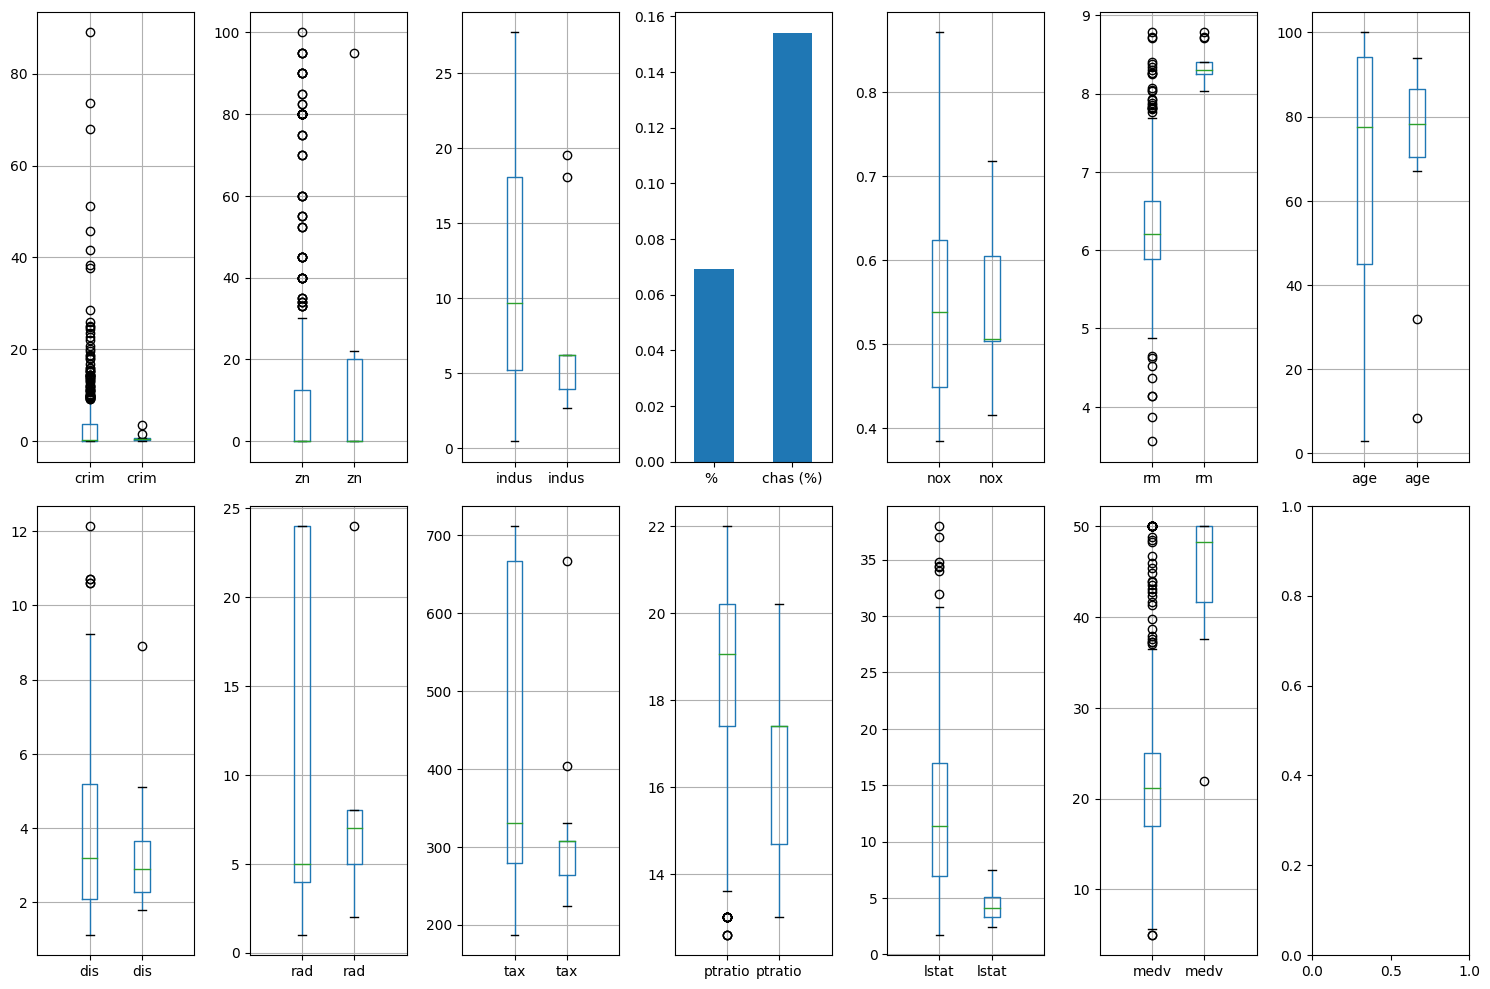

In [13]:
# Old drawings
# fig, ax = plt.subplots(1,4,figsize=(16, 8), width_ratios=(10, 10, 1, 1))

# ax[0].set_title('default')
# df.drop(columns='tax').boxplot(ax=ax[0]);

# ax[1].set_title('>8 avg. rooms')
# df[df['rm']>8].drop(columns='tax').boxplot(ax=ax[1]);

# ax[2].set_title('d')
# df[['tax']].boxplot(ax=ax[2]);

# ax[3].set_title('>8')
# df.loc[df['rm']>8, ['tax']].boxplot(ax=ax[3]);

fig, ax = plt.subplots(2,7, figsize=(15, 10))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    df.loc[df['rm']>8, [col]].boxplot(ax=ax[i])
    df[[col]].boxplot(ax=ax[i], positions=[0.5])

ax[3].clear()
def_char_perc = df[(df['chas']==1)].shape[0] / df.shape[0]
more8_char_perc = df[(df['rm']>8) & (df['chas']==1)].shape[0] / df[(df['rm']>8)].shape[0]
pd.Series([def_char_perc, more8_char_perc], index=['% ', 'chas (%)']).plot.bar(ax=ax[3], rot=0)

plt.tight_layout()

From the data extracted below, there is some important distinction, that suburbs that average more than 8 rooms per dwelling has:
- lower crime rates,
- sparser housing placements,
- closer to employment centres,
- lower percentage of lower status of the population</br>
average socioeconomic status is higher), and
- more expensive homes.

Another distinction, which is:
- Lower proportion of non-retail business,
- Larger % of living area bounding Charles River,
- Slightly lower mean NO2 concentration, with less variance (no extra high NO2),
- Average number of rooms per dwelling is high; between 8 and 9,
- Large % of old homes,
- Mainly less accessible to radial highways, and
- Lower property-tax rate.